# Descriptive Analysis

In this notebook, I will import the cleaned data and come up with as many insights as possible

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Read the clean data

In [3]:
trump = pd.read_csv("data/DonaldTrumpClean.csv")
obama = pd.read_csv("data/BarackObamaClean.csv")
clinton = pd.read_csv("data/HillaryClintonClean.csv")

In [5]:
trump['date'] = pd.to_datetime(trump['date'])
obama['date'] = pd.to_datetime(obama['date'])
clinton['date'] = pd.to_datetime(clinton['date'])

### Insight 1: Analysis of how active each of them are

Time frame for the dataset is 01-01-2014 to 13-10-2016

In [36]:
xpos = ["Trump", "Obama", "Clinton"]
ypos = [len(trump), len(obama), len(clinton)]

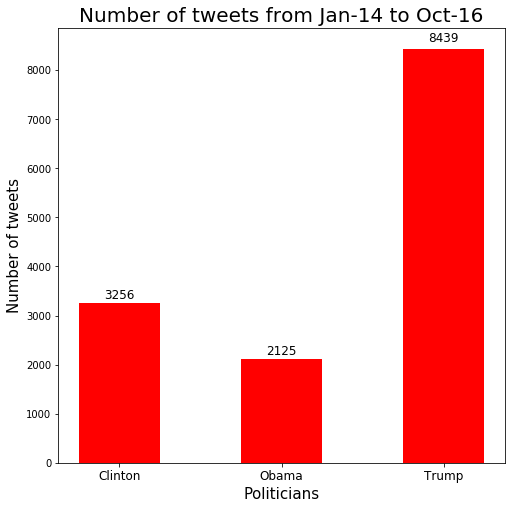

In [47]:
width = 0.5       # the width of the bars

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

rects = ax.bar(xpos, ypos, width, color='r')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
        

#Add the title of the plot
ax.set_title( "Number of tweets from Jan-14 to Oct-16", fontsize=20)
ax.set_xticklabels(['Clinton', 'Obama', 'Trump'], fontsize=12)
plt.ylabel("Number of tweets", fontsize=15)
plt.xlabel("Politicians", fontsize=15)
autolabel(rects)

plt.show()

<div class="alert alert-success">
**Insights** <br/>
From this graph, we can infer that Trump is the most active on Twitter. <br/>
His tweets are more than Hillary Clinton and Barack Obama's combined.<br/>
This is not surprising because he is famous for being expressive about his feelings and being brutally honest on twitter. We'll find out more about his specific tweets as we analyse the dataset further. <br/>
However, the difference is slightly surprising especially given the fact that Obama is 15 years younger to him and should be more savvy towards social media

</div>

### Time series of number of tweets every quarter

In this section, we will analyse the time-series trend of number of tweets leading up to the election.
We will be plotting the number of tweets per quarter from 2014 to 2016 except the last quarter of 2016 because we have data only until October

In [48]:
trump_copy = trump.copy()
obama_copy = obama.copy()
clinton_copy = clinton.copy()

#Creating a new column to change the date to quarter number
trump_copy['quarters'] = trump_copy.date.dt.quarter + (trump_copy.date.dt.year - 2014)*4
obama_copy['quarters'] = obama_copy.date.dt.quarter + (obama_copy.date.dt.year - 2014)*4
clinton_copy['quarters'] = clinton_copy.date.dt.quarter + (clinton_copy.date.dt.year - 2014)*4

In [49]:
#Converting the columns to integer
trump_copy['quarters'] = trump_copy['quarters'].astype(int)
obama_copy['quarters'] = obama_copy['quarters'].astype(int)
clinton_copy['quarters'] = clinton_copy['quarters'].astype(int)

Grouping by quarters and counting the number of tweets per quarter

In [10]:
trumpQuartCount = trump_copy.groupby(['quarters'])['text'].count()
obamaQuartCount = obama_copy.groupby(['quarters'])['text'].count()
clintonQuartCount = clinton_copy.groupby(['quarters'])['text'].count()

Drop the last quarter because we only have data until October

In [11]:
trumpQuartCount.drop(12, inplace=True)
clintonQuartCount.drop(12, inplace=True)
obamaQuartCount.drop(12, inplace=True)

Since clinton has no data for 2014, we will add those quarters to have 0 tweets

In [12]:
for i in range(1,5):
    clintonQuartCount[i] = 0 
clintonQuartCount.sort_index(inplace=True)

We will label the quarters for plotting

In [13]:
quarters = ['2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4', 
           '2015-Q1', '2015-Q2', '2015-Q3', '2015-Q4',
           '2016-Q1', '2016-Q2', '2016-Q3']

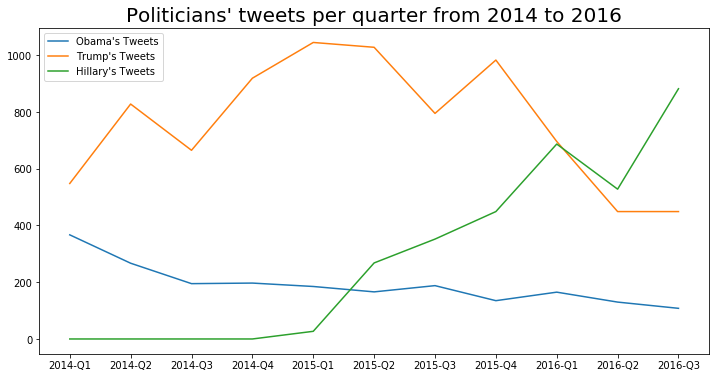

In [14]:
plt.figure(figsize=(12, 6))  # width:20, height:6
plt.title("Politicians' tweets per quarter from 2014 to 2016", fontsize=20)
plt.plot(quarters, obamaQuartCount)
plt.plot(quarters, trumpQuartCount)
plt.plot(quarters, clintonQuartCount)

plt.legend(['Obama\'s Tweets', 'Trump\'s Tweets', 'Hillary\'s Tweets'], loc='upper left')
plt.show()

<div class="alert alert-success">
**Insights** <br/>
This graph shows a shocking trend in Hillary Clinton's tweets. <br/>
She was silent throughout 2014 and her tweets rose exponential in the quarters leading up to the election. She even crossed Trump in the last 2 quarters. <br/>
For Trump, he started gaining people's attention back in 2014 with his tweets and once he gained traction, he reduced the number of tweets closer to the due date. Smart move.
As for Obama, his tweets were consistently low in number and more focussed (as we will analyse later)
</div>

## Creating wordclouds

Now we'll be creating wordclouds to have a rough gauge of the most frequently used words by the different politicians before we go into analysing the sentiments

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageFilter

In [52]:
#This function will be used to convert the image into a mask for the wordcloud as seen below
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [53]:
#load image to create a mask
trump_mask = np.array(Image.open("images/trump.png"))

# Transform your mask into a new one that will work with the function:
transformed_trump_mask = np.ndarray((trump_mask.shape[0],trump_mask.shape[1]), np.int32)

for i in range(len(trump_mask)):
    transformed_trump_mask[i] = list(map(transform_format, trump_mask[i]))
    
#generate stopwords to remove from the wordcloud
stopwords = set(STOPWORDS)
stopwords.update(["realDonaldTrump", "@realDonaldTrump", "Donald", "Trump"])
trumpTweets = " ".join(tweet for tweet in trump.text)

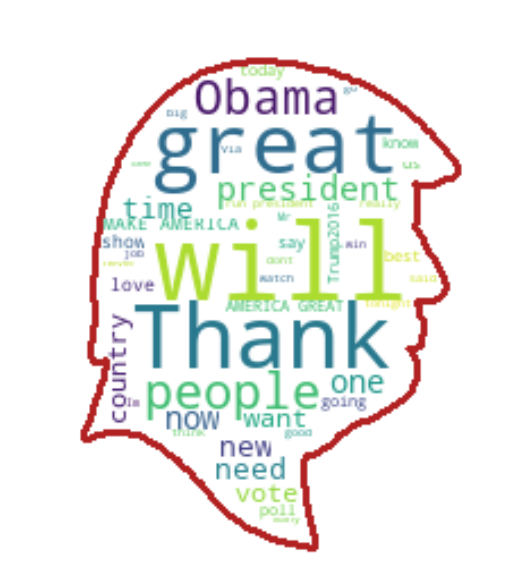

In [54]:
# Create a word cloud 
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_trump_mask,
               stopwords=stopwords, contour_width=3, contour_color = "firebrick")

wc.generate(trumpTweets)

# store to file
wc.to_file("images/trumpWordcloud.png")

plt.figure(figsize=[20,10], edgecolor='black')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<div class="alert alert-success">
**Insights** <br/>
In this Trump-shaped Wordcloud, we can see that the most common words Trump uses are `Thank`, `will`, `great` etc. <br/>
He uses his patented phrase `Make America Great Again` consistentyl throughout his tweets. <br/>
Unsurprisingly, he refers to `President Obama` a lot as well
</div>

In [19]:
obama_mask = np.array(Image.open("images/obama.png"))
# Transform your mask into a new one that will work with the function:
transformed_obama_mask = np.ndarray((obama_mask.shape[0],obama_mask.shape[1]), np.int32)

for i in range(len(obama_mask)):
    transformed_obama_mask[i] = list(map(transform_format, obama_mask[i]))
    
stopwords = set(STOPWORDS)
stopwords.update(["President", "Obama", "President Obama", "bo", "ofa"])
obamaTweets = " ".join(tweet for tweet in obama.text)

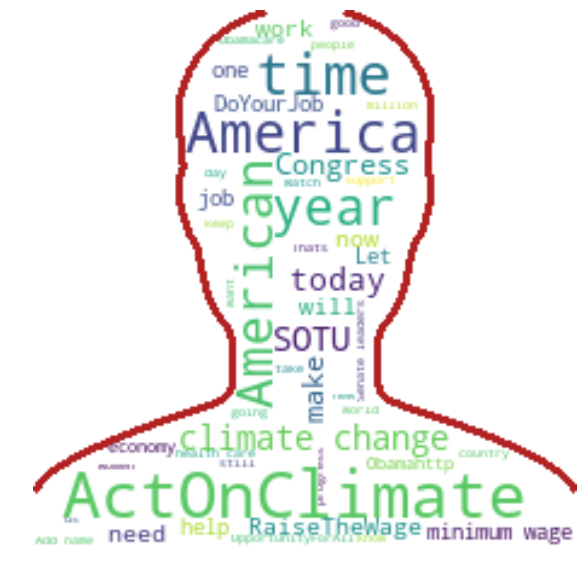

In [20]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000,
               stopwords=stopwords, mask=transformed_obama_mask,
               contour_width=3, contour_color = "firebrick")

# Generate a wordcloud
wc.generate(obamaTweets)

# store to file
wc.to_file("images/obamaWordcloud.png")

# show
plt.figure(figsize=[20,10], edgecolor='black')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<div class="alert alert-success">
**Insights** <br/>
As expected, Obama's most frequented words are issues which he's trying to address.
For example, `ActOnClimage`, `RaiseTheWage`. Obama doesn't indulge in emotional tweets, rather he chooses to increase awareness of the issues and trying to solve them.
</div>

In [58]:
stopwords = set(STOPWORDS)
stopwords.update(["Hillary", "twitter", "https", "hrc", "io", "amp", "twimg"])
clintonTweets = " ".join(tweet for tweet in clinton.text)

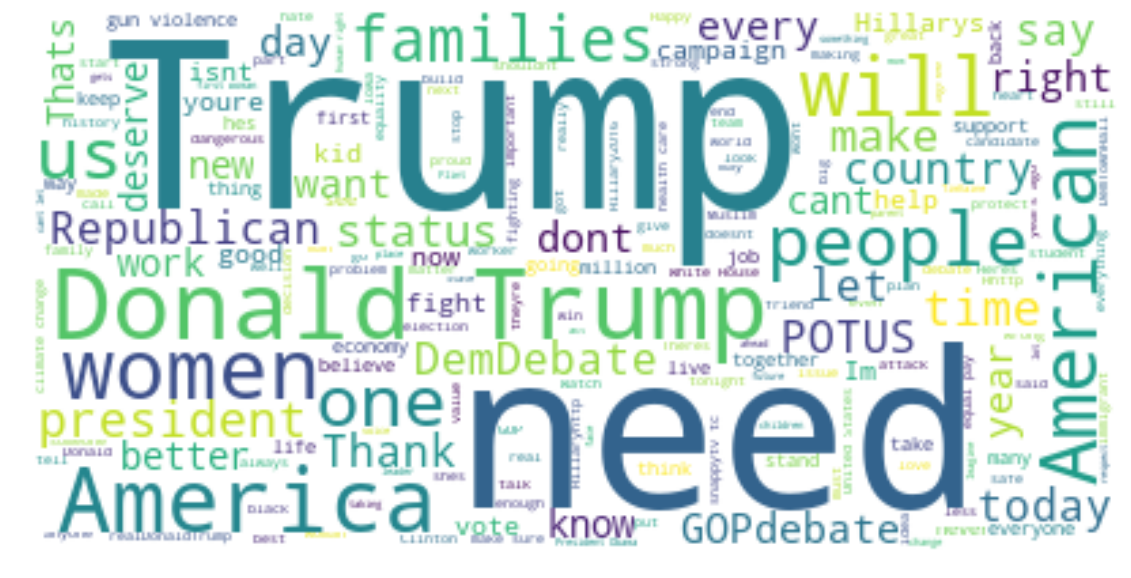

In [59]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, stopwords=stopwords)

# Generate a wordcloud
wc.generate(clintonTweets)

# store to file
wc.to_file("images/clintonWordcloud.png")

# show
plt.figure(figsize=[20,10], edgecolor='black')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<div class="alert alert-success">
**Insights** <br/>
In this wordcloud, we can see that Hillary is obssessed with what `Trump` is doing and most of her tweets are a response to him or referring to him. <br/>
As we noticed earlier in the time series analysis, Hillary had a spike in the number of tweets closer to the day, it was probably her trying to attack everything Trump is saying and influence public opinion. <br/>
She also refers to `women` and tries to reach out to them to gain a competitive advantage on Trump
</div>